In [1]:
# Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import copy as cp
import importlib
import statsmodels.stats.outliers_influence as sso

import self_defined_functions as ft
import seaborn as sns

from matplotlib.ticker import FuncFormatter
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

In [2]:
importlib.reload( ft )

<module 'self_defined_functions' from 'c:\\PuSung\\University\\Sophomore\\110-2 Academic\\Satistics\\Statistics_FinalProject\\project_TRA\\self_defined_functions.py'>

In [3]:
ft.gen_ANOVA_xlsx()

In [4]:
df = pd.read_excel( 'ANOVA_df.xlsx' )

In [5]:
df = df[df['is_typhoon'] == False]
df = df[df['year'] < 2020]

In [6]:
df.head()

,Unnamed: 0,date,year,month,day,weekday,trans_cnt,metro_cnt,is_typhoon,is_working,day_type,is_foreign,holi_type,holi_len,phase,is_NYE,belong
0,0,2005-01-01,2005,1,1,5,382902,0,False,False,National,False,元旦,2,mid,False,National
1,1,2005-01-02,2005,1,2,6,412908,0,False,False,National,False,元旦,2,end,False,National
2,2,2005-01-03,2005,1,3,0,298141,0,False,True,weekday,False,None,0,None,False,None
3,3,2005-01-04,2005,1,4,1,252051,0,False,True,weekday,False,None,0,None,False,None
4,4,2005-01-05,2005,1,5,2,263399,0,False,True,weekday,False,None,0,None,False,None


# Part 1 

In [7]:
df_1 = df[df['belong'] != 'None']
df_1 = df_1[df_1['is_foreign'] == False]
df_1 = df_1[df_1['phase'] != 'None']

In [8]:
df_1.head()

,Unnamed: 0,date,year,month,day,weekday,trans_cnt,metro_cnt,is_typhoon,is_working,day_type,is_foreign,holi_type,holi_len,phase,is_NYE,belong
0,0,2005-01-01,2005,1,1,5,382902,0,False,False,National,False,元旦,2,mid,False,National
1,1,2005-01-02,2005,1,2,6,412908,0,False,False,National,False,元旦,2,end,False,National
6,6,2005-01-07,2005,1,7,4,403391,0,False,True,weekday,False,None,0,start,False,weekend
7,7,2005-01-08,2005,1,8,5,408412,0,False,False,weekend,False,None,2,mid,False,weekend
8,8,2005-01-09,2005,1,9,6,452831,0,False,False,weekend,False,None,2,end,False,weekend


In [9]:
results0 = smf.ols('trans_cnt ~ C(belong) + C(phase) + C(belong):C(phase)', data=df_1).fit()
aov_14106_two = sms.anova_lm( results0, typ=2 )

aov_14106_two

,sum_sq,df,F,PR(>F)
C(belong),6.965187e+11,2.0,31.017601,5.051835e-14
C(phase),6.119175e+11,2.0,27.250110,1.996081e-12
C(belong):C(phase),2.228479e+11,4.0,4.961968,5.536139e-04
Residual,2.646392e+13,2357.0,NaN,NaN


In [10]:
stats.shapiro( results0.resid )

ShapiroResult(statistic=0.9731783270835876, pvalue=1.1736901254431855e-20)

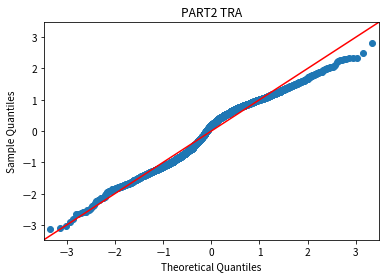

In [11]:
fig = sm.qqplot( results0.resid, stats.norm, fit=True, line = '45' ) 
plt.title( 'PART2 TRA' )
plt.savefig( 'images/TRA_PART2_ANOVA_qqplot.jpg' )

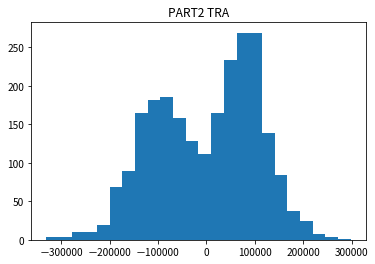

In [12]:
_ = plt.hist( results0.resid, bins='auto' )
plt.title( 'PART2 TRA' )
plt.savefig( 'images/TRA_PART2_ANOVA_hist.jpg' )

In [13]:
set( df_1['belong'] )

{'National', 'Traditional', 'weekend'}

In [14]:
# Set 
date_type_set = ['National', 'Traditional', 'weekend']
phase_set = ['start', 'mid', 'end']

In [15]:
y = {}
x = range( 3 )

In [16]:
for dtype in date_type_set : 
    y[dtype] = []
    for ptype in phase_set : 
        temp_df = df_1[np.array( df_1['phase'] == ptype ) & np.array( df_1['belong'] == dtype )]
        y[dtype].append( temp_df['trans_cnt'].mean() )

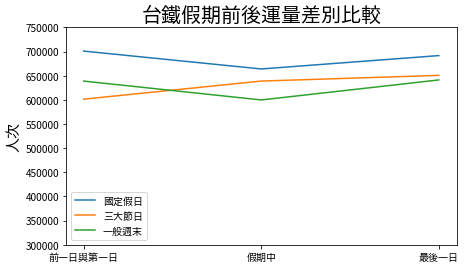

In [17]:
fig, ax = plt.subplots( figsize = ( 7, 4 ) )
plt.plot( x, y['National'], label = '國定假日' )
plt.plot( x, y['Traditional'], label = '三大節日' )
plt.plot( x, y['weekend'], label = '一般週末' )
plt.ylim( 300000, 750000 )
plt.xticks( x, ['前一日與第一日', '假期中', '最後一日'] )
plt.title( '台鐵假期前後運量差別比較', fontsize = 20 )
plt.ylabel( '人次', fontsize = 15 )
plt.legend()
plt.savefig( 'images/TRA_PART2_compare.jpg' )

In [18]:
trCnt = []
for dtype in date_type_set : 
    trCnt.append( df_1[df_1['belong'] == dtype]['trans_cnt'] )

In [19]:
ft.kruskal( trCnt[0], trCnt[1], trCnt[2] )

9.592326932761353e-14

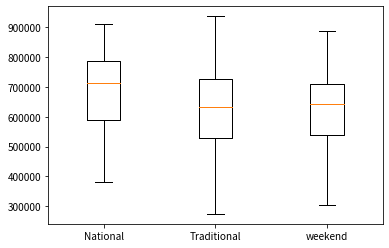

In [20]:
plt.boxplot( trCnt )
plt.xticks( range( 1, 4 ), date_type_set )
plt.show()

# Part 2 

In [21]:
df.head()

,Unnamed: 0,date,year,month,day,weekday,trans_cnt,metro_cnt,is_typhoon,is_working,day_type,is_foreign,holi_type,holi_len,phase,is_NYE,belong
0,0,2005-01-01,2005,1,1,5,382902,0,False,False,National,False,元旦,2,mid,False,National
1,1,2005-01-02,2005,1,2,6,412908,0,False,False,National,False,元旦,2,end,False,National
2,2,2005-01-03,2005,1,3,0,298141,0,False,True,weekday,False,None,0,None,False,None
3,3,2005-01-04,2005,1,4,1,252051,0,False,True,weekday,False,None,0,None,False,None
4,4,2005-01-05,2005,1,5,2,263399,0,False,True,weekday,False,None,0,None,False,None


In [22]:
df_2  = df[np.array( df['belong'] == 'None' ) | np.array( df['belong'] == 'weekend' ) ]

In [23]:
results1 = smf.ols('trans_cnt ~ C(is_foreign) + C(is_working) + C(is_foreign):C(is_working)', data=df_1).fit()
aov_14106_two = sms.anova_lm( results1, typ=2 )

aov_14106_two

c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1900: RuntimeWarning: invalid value encountered in true_divide
  F /= J
c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does n

,sum_sq,df,F,PR(>F)
C(is_foreign),NaN,1.0,NaN,NaN
C(is_working),NaN,1.0,NaN,NaN
C(is_foreign):C(is_working),NaN,1.0,NaN,NaN
Residual,2.786186e+13,2364.0,NaN,NaN


In [24]:
stats.shapiro( results1.resid )

ShapiroResult(statistic=0.9821327328681946, pvalue=1.1476317053450507e-16)

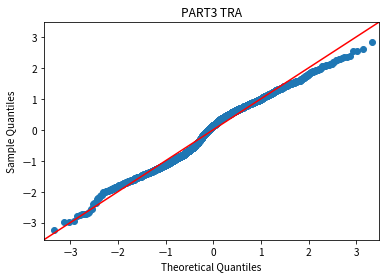

In [25]:
fig = sm.qqplot( results1.resid, stats.norm, fit=True, line = '45' ) 
plt.title( 'PART3 TRA' )
plt.savefig( 'images/TRA_PART3_ANOVA_qqplot.jpg')

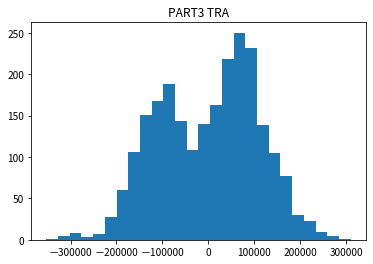

In [26]:
plt.hist( results1.resid, bins='auto' )
plt.title( 'PART3 TRA' )
plt.savefig( 'images/TRA_PART3_ANOVA_hist.jpg')

In [27]:
trCnt = []
for btype in [True, False] : 
    trCnt.append( list( df_2[df_2['is_foreign'] == btype]['trans_cnt'] ) )

In [28]:
ft.kruskal( trCnt[0], trCnt[1] )

0.013232308021484784

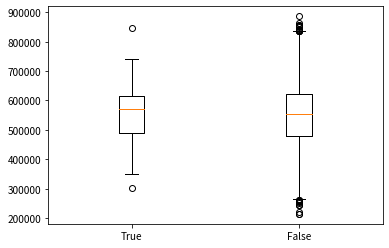

In [29]:
plt.boxplot( trCnt )
plt.xticks( range( 1, 3 ), [True, False] )
plt.show()

# Part 3 

In [30]:
df_3 = df[df['belong'] != 'None']

In [31]:
df_3.head()

,Unnamed: 0,date,year,month,day,weekday,trans_cnt,metro_cnt,is_typhoon,is_working,day_type,is_foreign,holi_type,holi_len,phase,is_NYE,belong
0,0,2005-01-01,2005,1,1,5,382902,0,False,False,National,False,元旦,2,mid,False,National
1,1,2005-01-02,2005,1,2,6,412908,0,False,False,National,False,元旦,2,end,False,National
6,6,2005-01-07,2005,1,7,4,403391,0,False,True,weekday,False,None,0,start,False,weekend
7,7,2005-01-08,2005,1,8,5,408412,0,False,False,weekend,False,None,2,mid,False,weekend
8,8,2005-01-09,2005,1,9,6,452831,0,False,False,weekend,False,None,2,end,False,weekend


In [32]:
cnt = []
holi_len = []

phase = list( df_3['phase'] )
trans_cnt = list( df_3['trans_cnt'] )
holi_len_all = list( df_3['holi_len'] )

accu = 0
le = 0 
for i in range( 2, len( phase ) ) :
    if phase[i] == 'start' : 
        accu += trans_cnt[i]
        le += 1 
    elif phase[i] == 'end' : 
        accu += trans_cnt[i]
        le += 1 
        cnt.append( accu / le )
        accu = 0 
        le = 0 
        holi_len.append( holi_len_all[i] )  

In [33]:
df_3_ = pd.DataFrame( { 'trans_cnt' : cnt, 'holi_len': holi_len } )

In [34]:
results2 = smf.ols('trans_cnt ~ C(holi_len)', data=df_3_).fit()
aov_14106_two = sms.anova_lm( results2, typ=2 )

aov_14106_two

,sum_sq,df,F,PR(>F)
C(holi_len),3.004132e+11,3.0,10.03933,0.000002
Residual,7.381161e+12,740.0,NaN,NaN


In [35]:
stats.shapiro( results2.resid )

ShapiroResult(statistic=0.960867166519165, pvalue=3.379672301566383e-13)

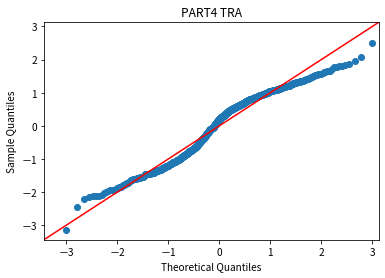

In [36]:
fig = sm.qqplot( results2.resid, stats.norm, fit=True, line = '45' ) 
plt.title( 'PART4 TRA' )
plt.savefig( 'images/TRA_PART4_ANOVA_qqplot.jpg')

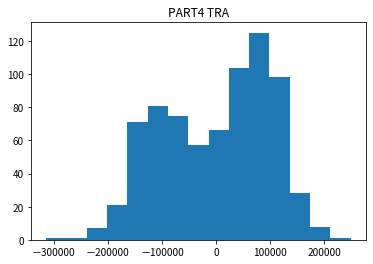

In [37]:
_ = plt.hist( results2.resid, bins='auto' )
plt.title( 'PART4 TRA' )
plt.savefig( 'images/TRA_PART4_ANOVA_hist.jpg')

In [38]:
trCnt = [[],[],[],[]]
for i in range( len( cnt ) ) : 
    trCnt[holi_len[i]-2].append( cnt[i] ) 

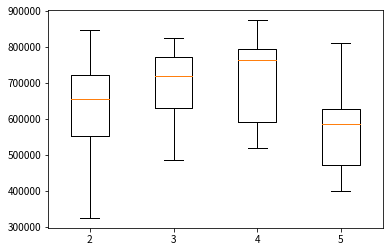

In [39]:
plt.boxplot( trCnt )
plt.xticks( range( 1, 5 ), range( 2, 6 ) )
plt.show()

四天以下真的有節節上升的趨勢；五天的話感覺是大家會想要避開尖峰時間，所以不見得會選擇第一天跟最後一天才回家

In [40]:
ft.kruskal( trCnt[0], trCnt[1], trCnt[2], trCnt[3] )

1.6415555681437155e-07

# Part 4 

In [41]:
df_all = pd.read_excel( 'ANOVA_df.xlsx' )

In [42]:
df_5 = df_all['trans_cnt']

In [43]:
df_5 = pd.concat( [df_5, df_all['date']], axis = 1 )
df_5 = pd.concat( [df_5, df_all['year']], axis = 1 )
df_5 = pd.concat( [df_5, df_all['month']], axis = 1 )
df_5 = pd.concat( [df_5, df_all['day']], axis = 1 )

In [44]:
dummy = pd.get_dummies( df_all['weekday'], prefix = 'weekday' )
df_5 = pd.concat( [df_5, dummy], axis = 1 )
del df_5["weekday_6"]

In [45]:
dummy = pd.get_dummies( df_all['belong'], prefix = 'belong' )
df_5 = pd.concat( [df_5, dummy], axis = 1 )
del df_5["belong_weekend"]

In [46]:
dummy = pd.get_dummies( df_all['phase'], prefix = 'phase' )
df_5 = pd.concat( [df_5, dummy], axis = 1 )
del df_5["phase_mid"]

In [47]:
df_5_to_pre = df_5[df_5['year'] >= 2020]


In [48]:
df_5 = df_5[df_5['year'] < 2020]

In [49]:
y_data = df_5.iloc[:,:1] # If yvalue is in the fisrt column
x_data = sm.add_constant( df_5.iloc[:,2:] ) # If yvalue is in the fisrt column
olsmod = sm.OLS( y_data, x_data )
result_reg = olsmod.fit()
print( result_reg.summary() )

                            OLS Regression Results                            
Dep. Variable:              trans_cnt   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1088.
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        21:48:30   Log-Likelihood:                -67983.
No. Observations:                5478   AIC:                         1.360e+05
Df Residuals:                    5462   BIC:                         1.361e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.632e+07   3.74

In [50]:
df_all[df_all['year'] >= 2020]['date']

5478   2020-01-01
5479   2020-01-02
5480   2020-01-03
5481   2020-01-04
5482   2020-01-05
          ...    
6325   2022-04-27
6326   2022-04-28
6327   2022-04-29
6328   2022-04-30
6329   2022-05-01
Name: date, Length: 852, dtype: datetime64[ns]

In [51]:
pre = result_reg.predict( sm.add_constant( df_5_to_pre.iloc[:,2:] ))
df_5_to_pre = pd.concat( [df_5_to_pre, pre], axis = 1, names = ['Predict'] )

In [52]:
df_5_to_pre

,trans_cnt,date,year,month,day,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,belong_National,belong_None,belong_Traditional,phase_None,phase_end,phase_start,0
5478,689759,2020-01-01,2020,1,1,0,0,1,0,0,0,1,0,0,1,0,0,717247.199157
5479,605313,2020-01-02,2020,1,2,0,0,0,1,0,0,0,1,0,1,0,0,633456.243496
5480,694980,2020-01-03,2020,1,3,0,0,0,0,1,0,0,0,0,0,0,1,766641.612317
5481,638517,2020-01-04,2020,1,4,0,0,0,0,0,1,0,0,0,0,0,0,724428.583091
5482,653592,2020-01-05,2020,1,5,0,0,0,0,0,0,0,0,0,0,1,0,767932.230501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6325,375156,2022-04-27,2022,4,27,0,0,1,0,0,0,0,1,0,1,0,0,672199.274378
6326,377599,2022-04-28,2022,4,28,0,0,0,1,0,0,0,1,0,1,0,0,678305.707790
6327,475282,2022-04-29,2022,4,29,0,0,0,0,1,0,0,1,0,1,0,0,696968.517503
6328,325490,2022-04-30,2022,4,30,0,0,0,0,0,1,0,1,0,1,0,0,646493.312222


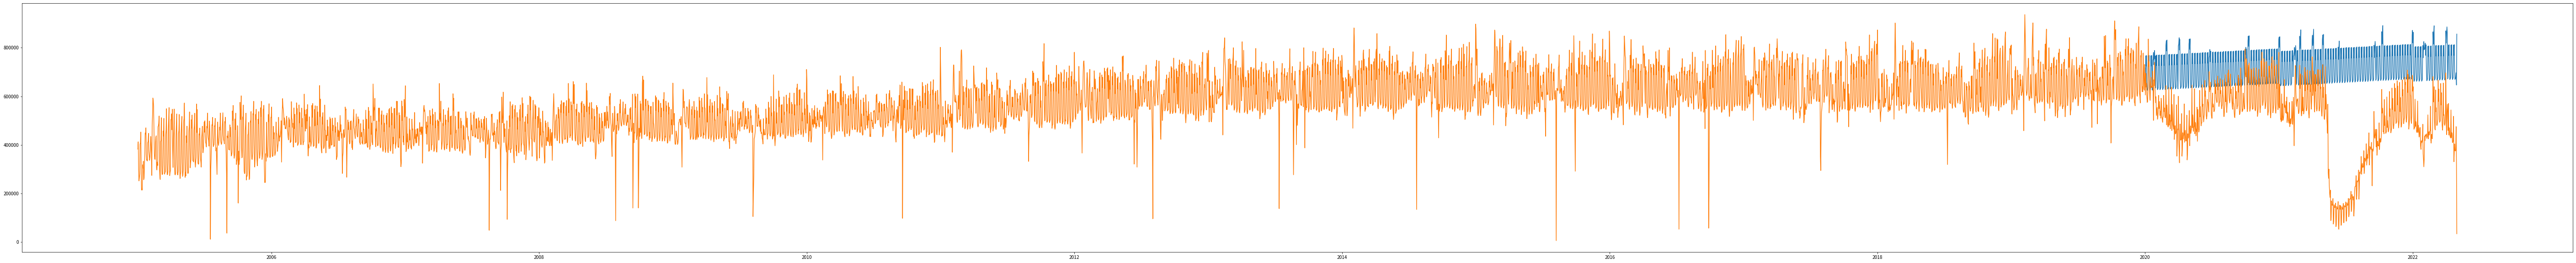

In [53]:
fig, ax = plt.subplots( figsize = ( 100, 10 ) )
plt.plot( df_5_to_pre['date'], df_5_to_pre.iloc[:,-1])
plt.plot( df_all['date'], df_all['trans_cnt'])
plt.savefig( 'temp.jpg')

In [54]:
st, data, ss2 = sso.summary_table( result_reg, alpha=0.05 )
print( "Columns in data are: %s" % ss2 )
# Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


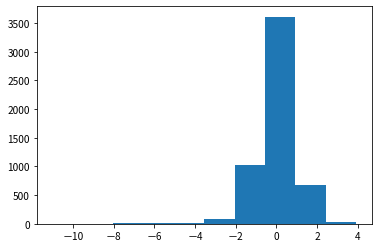

In [55]:
_ = plt.hist( SD )

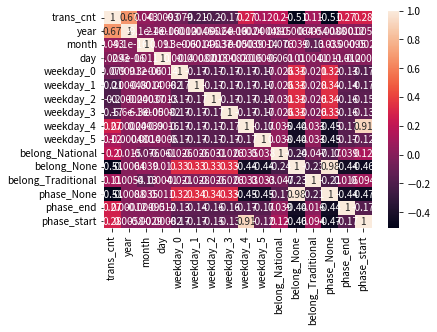

In [56]:
corr_1_3 = df_5.corr()
_ = sns.heatmap(corr_1_3, annot=True)

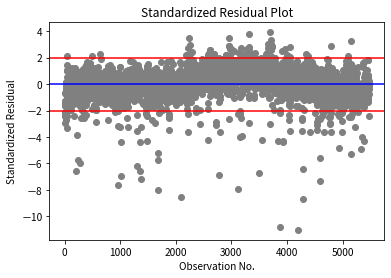

In [57]:
ID = df_5.index
plt.plot(ID , SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

In [58]:
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

In [59]:
d_w = Durbin_Watson_test( SD )
print(d_w)

x_square_sum =  5483.87796028298
size =  5478
x_d =  [0. 0. 0. ... 0. 0. 0.]
x_d =  [ 0.         -0.22801791  0.88345806 ... -2.18982646  1.70127416
  0.86269008]
d =  0.855383878161767
0.855383878161767


In [60]:
stats.shapiro( SD )

c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8850547075271606, pvalue=0.0)

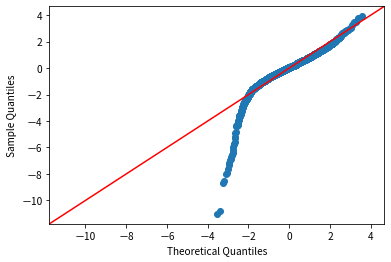

In [61]:
fig = sm.qqplot( SD, stats.norm, fit=True, line = '45' ) 

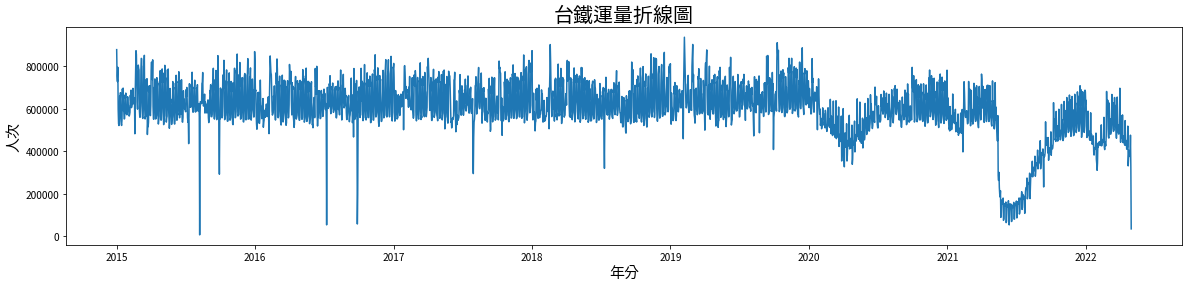

In [62]:
df_all = pd.read_excel( 'ANOVA_df.xlsx' )
df_all = df_all[df_all['year'] > 2014]

fig, ax = plt.subplots( figsize = ( 20, 4 ) )
ax.plot( df_all['date'], df_all['trans_cnt'] )
plt.title( '台鐵運量折線圖', fontsize = 20 )
plt.xlabel( '年分', fontsize = 15 )
plt.ylabel( '人次', fontsize = 15 )
plt.savefig( "images/TRA_history.jpg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


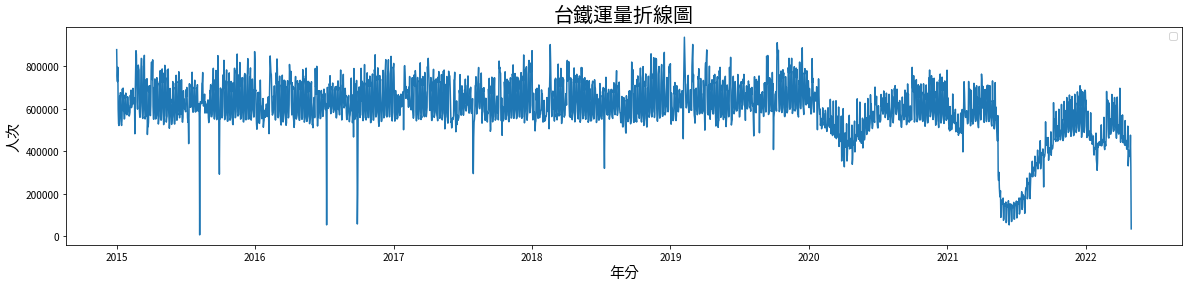

In [63]:
df_all = pd.read_excel( 'ANOVA_df.xlsx' )
df_all = df_all[df_all['year'] > 2014]
ty = df_all[df_all['is_typhoon'] == True]

fig, ax = plt.subplots( figsize = ( 20, 4 ) )
ax.plot( df_all['date'], df_all['trans_cnt'] )
plt.title( '台鐵運量折線圖', fontsize = 20 )
# ax.scatter( ty['date'], ty['trans_cnt'], c = 'r', label = '颱風' )
plt.xlabel( '年分', fontsize = 15 )
plt.ylabel( '人次', fontsize = 15 )
plt.legend()
plt.savefig( "images/TRA_history.jpg" )

## Metro

In [64]:
df_5_metro = df_all[df_all['metro_cnt']!= 0]['metro_cnt']

In [65]:
df_5_metro = pd.concat( [df_5_metro, df_all['date']], axis = 1 )
df_5_metro = pd.concat( [df_5_metro, df_all['year']], axis = 1 )
df_5_metro = pd.concat( [df_5_metro, df_all['month']], axis = 1 )
df_5_metro = pd.concat( [df_5_metro, df_all['day']], axis = 1 )

In [66]:
dummy = pd.get_dummies( df_all['weekday'], prefix = 'weekday' )
df_5_metro = pd.concat( [df_5, dummy], axis = 1 )
del df_5["weekday_6"]

KeyError: 'weekday_6'

In [ ]:
df_5_metro_to_pre = df_5_metro[df_5_metro['year'] >= 2020]